# Proyek Analisis Data: Bike Sharing Dataset
- Nama: RAHMADI RIDWAN SADHEWO
- Email: rahmadi.ridwan.s@gmail.com
- Id Dicoding: rahmadi_ridwan

## Menentukan Pertanyaan Bisnis

Pertanyaan 1:

**Apakah perbedaan dengan pengguna casual dan registered dari segi waktu penggunaannya?**


Pertanyaan 2:

**Adakah faktor lain yang bisa menjelaskan perbedaan pengguna casual dan registered yang bisa digunakan sebagai insight untuk memperbaiki model bisnis pengada jasa bike sharing untuk mengakomodir pelanggannya dengan lebih efektif?**

## Menyiapkan semua library yang dibutuhkan

In [1]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.0)

## Data Wrangling

### Gathering Data

In [2]:
!wget --no-check-certificate \
    'https://docs.google.com/uc?export=download&id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ' \
    -O Bike-sharing-dataset.zip

--2023-09-20 08:58:47--  https://docs.google.com/uc?export=download&id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ
Resolving docs.google.com (docs.google.com)... 74.125.134.100, 74.125.134.101, 74.125.134.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.134.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-a8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/moc0eueg0ne81q3t4semara8lk7g772k/1695200325000/09299834914491359665/*/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ?e=download&uuid=c6e54152-f7a6-41e2-bef2-89861d0006aa [following]
--2023-09-20 08:58:48--  https://doc-0s-a8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/moc0eueg0ne81q3t4semara8lk7g772k/1695200325000/09299834914491359665/*/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ?e=download&uuid=c6e54152-f7a6-41e2-bef2-89861d0006aa
Resolving doc-0s-a8-docs.googleusercontent.com (doc-0s-a8-docs.googleusercontent.com)... 172.253.123.132, 2607:f8b0

In [3]:
r = zipfile.ZipFile('/content/Bike-sharing-dataset.zip','r')
r.extractall()
r.close

with open('/content/Readme.txt','r') as f:
  print(f.read())

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

In [4]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

### Assessing Data

In [5]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Periksa Tipe Data Fitur-Fitur dalam Dataset**

In [7]:
df_day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
df_hour.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Fitur "dteday" yang seharusnya tanggal tercatat sebagai object, ini perlu diperbaiki di bagian Cleaning Data

**Periksa Keberadaan Missing Values**

In [9]:
df_day.isna().sum()[df_day.isna().sum() > 0]/df_day.shape[0]*100

Series([], dtype: float64)

In [10]:
df_hour.isna().sum()[df_hour.isna().sum() > 0]/df_hour.shape[0]*100

Series([], dtype: float64)

Tidak ada data yang hilang & perlu diimputasi

### Cleaning Data

**Ubah kolom "dteday" dari tipe object menjadi date/tanggal**

In [11]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'], format='%Y-%m-%d')
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'], format='%Y-%m-%d')

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Meskipun terdapat beberapa outlier secara teoretis, namun jumlahnya masih bisa dikatakan wajar & bukan sebab dari error pencatatan atau kesalahan yang lain

## Visualization & Explanatory Analysis

### Pertanyaan 1: **Apakah perbedaan dengan pengguna casual dan registered dari segi waktu penggunaannya?**

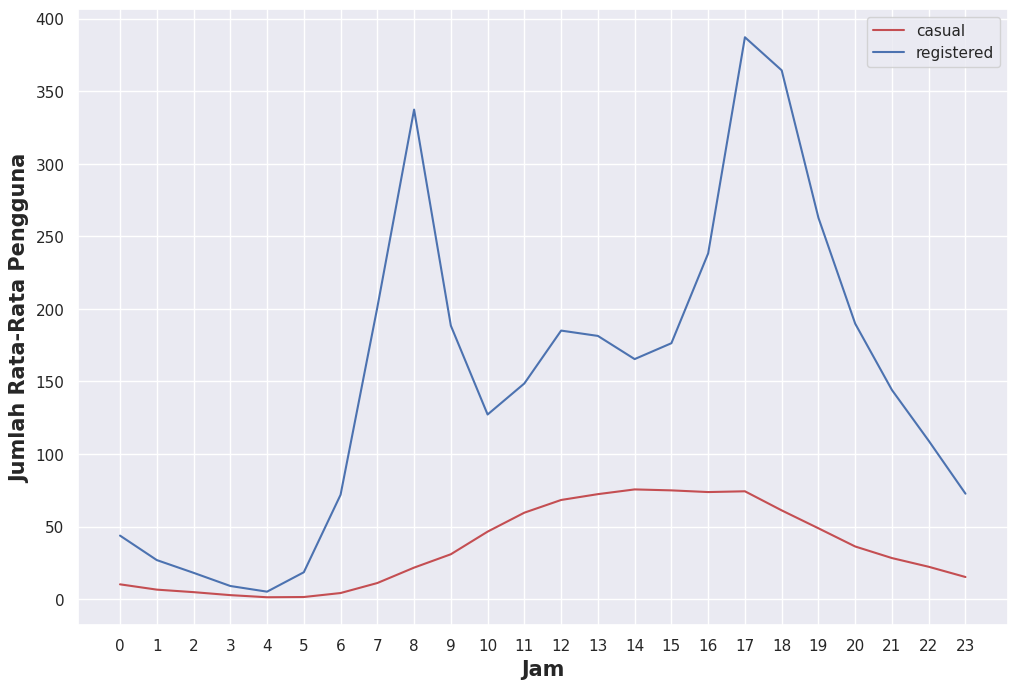

In [14]:
hr_grouped = df_hour[["hr", "casual", "registered"]].groupby(["hr"]).mean()

plt.figure(figsize=(12, 8))
plt.plot(hr_grouped.index, hr_grouped["casual"], label = "casual", color="C3")
plt.plot(hr_grouped.index, hr_grouped["registered"], label = "registered", color="C0")
plt.xticks(np.arange(0, 24, 1))
# plt.xlabel("Jam")
# plt.ylabel("Jumlah Rata-Rata Pengguna")
plt.xlabel('Jam', fontweight ='bold', fontsize = 15)
plt.ylabel('Jumlah Rata-Rata Pengguna', fontweight ='bold', fontsize = 15)
plt.legend()
plt.show()

Bagi pengguna **registered**, terlihat **memuncak di dua titik** yaitu pada **jam 8 pagi dan jam 5 sore**. Hal ini kemungkinan besar disebabkan mode penggunaan untuk pengguna register yaitu sebagai sarana transportasi untuk **menuju dan pulang dari kantor/kampus**.

Untuk pengguna **casual**, puncak penggunaan ini tidak terlihat dan tingkat pengunaannya secara kesuluruhan **tidak sebanyak pengguna registered**. Peningkatan tampak dari jam 5-6 pagi hingga **memuncak & relatif stabil di siang** hari sebelum  kembali **menurun setelah jam 5 sore**

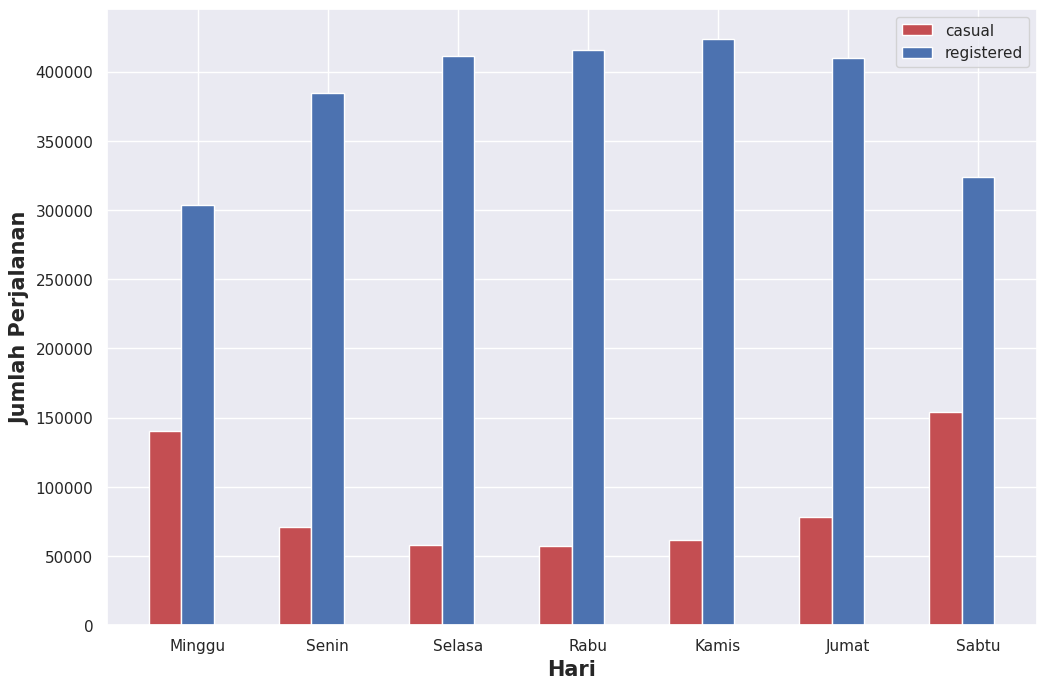

In [15]:
wd_grouped = df_day[["weekday", "casual", "registered"]].groupby(["weekday"]).sum()
wd_grouped["weekday"] = ['Minggu','Senin','Selasa','Rabu','Kamis','Jumat','Sabtu']

fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(len(wd_grouped["casual"]))
br2 = [x + 0.25 for x in br1]

plt.bar(br1, wd_grouped["casual"], color ='C3', width = 0.25, label ='casual')
plt.bar(br2, wd_grouped["registered"], color ='C0', width = 0.25, label ='registered')

# Adding Xticks
plt.xlabel('Hari', fontweight ='bold', fontsize = 15)
plt.ylabel('Jumlah Perjalanan', fontweight ='bold', fontsize = 15)
plt.xticks([r + 0.25 for r in range(len(wd_grouped["casual"]))], wd_grouped["weekday"])
plt.legend()
plt.show()

**Pengguna Casual** lebih cenderung menggunakan sepeda di **hari libur**

**Pengguna registered** lebih cenderung menggunakan sepeda di **hari kerja**

Maka dari itu bisa diuraikan bahwa pengguna casual menggunakan jasa bike sharing untuk rekreasi dan pengguna registered menggunakan jasa bike sharing lebih sebagai sarana transportasi untuk aktivitas sehari-hari

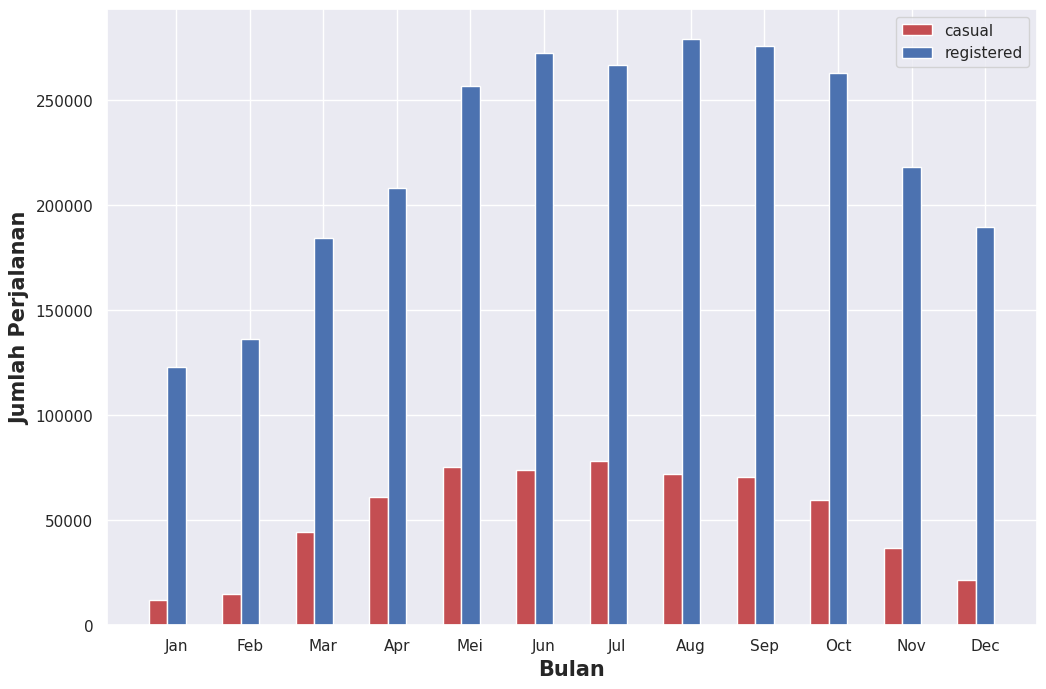

In [16]:
mt_grouped = df_day[["mnth", "casual", "registered", "atemp"]].groupby(["mnth"]).sum()
mt_grouped["month"] = ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(len(mt_grouped["casual"]))
br2 = [x + 0.25 for x in br1]

plt.bar(br1, mt_grouped["casual"], color ='C3', width = 0.25, label ='casual')
plt.bar(br2, mt_grouped["registered"], color ='C0', width = 0.25, label ='registered')

plt.xlabel('Bulan', fontweight ='bold', fontsize = 15)
plt.ylabel('Jumlah Perjalanan', fontweight ='bold', fontsize = 15)
plt.xticks([r + 0.25 for r in range(len(mt_grouped["casual"]))], mt_grouped["month"])
plt.legend()
plt.show()

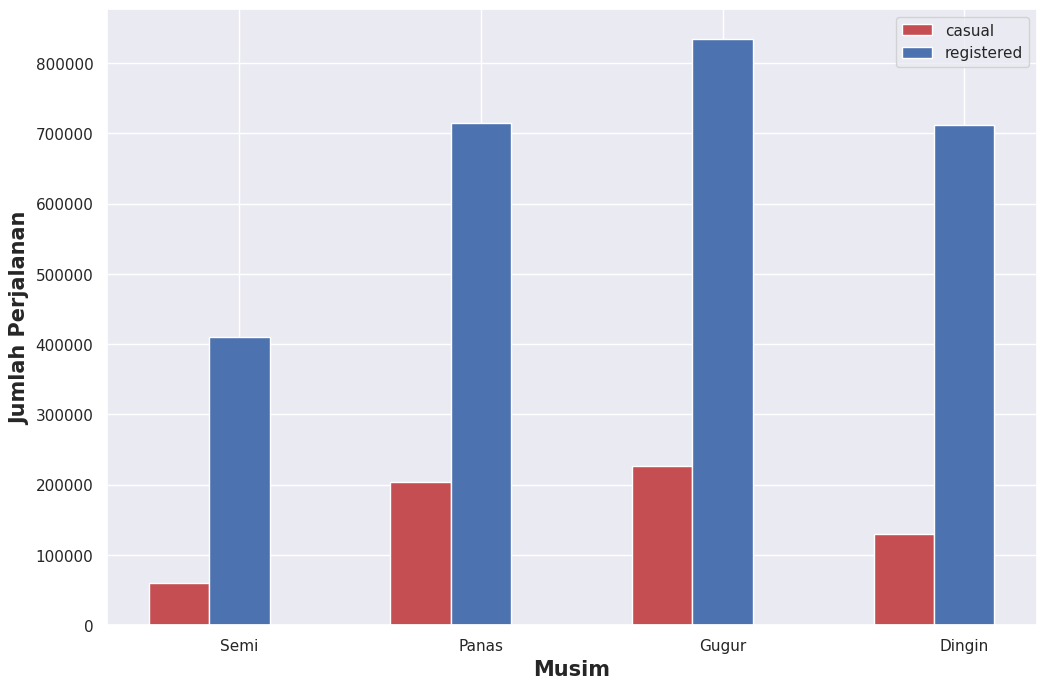

In [17]:
ss_grouped = df_day[["season", "casual", "registered", "atemp"]].groupby(["season"]).sum()
ss_grouped["season"] = ['Semi','Panas','Gugur','Dingin']

fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(len(ss_grouped["casual"]))
br2 = [x + 0.25 for x in br1]

plt.bar(br1, ss_grouped["casual"], color ='C3', width = 0.25, label ='casual')
plt.bar(br2, ss_grouped["registered"], color ='C0', width = 0.25, label ='registered')

plt.xlabel('Musim', fontweight ='bold', fontsize = 15)
plt.ylabel('Jumlah Perjalanan', fontweight ='bold', fontsize = 15)
plt.xticks([r + 0.25 for r in range(len(ss_grouped["casual"]))], ss_grouped["season"])
plt.legend()
plt.show()

Penggunaan jasa bike sharing apabila ditinjau dari segi bulan dan musim penggunaannya banyak digunakan di bulan-bulan di musim panas dan musim gugur. Ini bisa disebabkan oleh faktor cuaca di bulan-bulan dan musim tersebut yang ideal untuk bersepeda.



### Pertanyaan 2: **Adakah faktor lain yang bisa menjelaskan perbedaan pengguna casual dan registered yang bisa digunakan sebagai insight untuk memperbaiki model bisnis pengada jasa bike sharing untuk mengakomodir pelanggannya dengan lebih efektif?**

Ada beberapa parameter seperti suhu, kelembaban dan kecepatan angin yang bisa mengukur faktor cuaca ini. Fitur "feel temperature" yang selain suhu riil juga memperhitungkan faktor kelembaban dan kecepatan angin merupakan satuan yang tepat digunakan sebagai tolak ukur analisis karena mempertimbangkan ketiga-tiga variabel cuaca tersebut

**Cluster Analysis Penggunaan Bike Sharing berdasarkan Suhu Relatif**

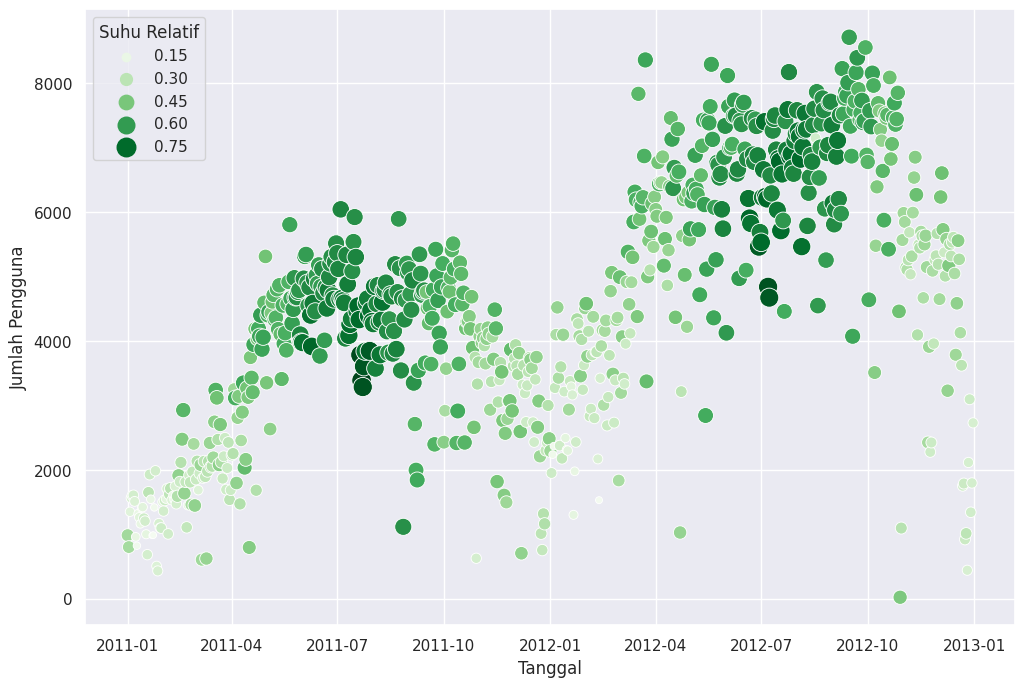

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(
    x=df_day["dteday"], y=df_day["cnt"], hue=df_day["atemp"],
    size=df_day["atemp"], sizes=(20, 200), palette='Greens', ax=ax
)
plt.legend(title='Suhu Relatif', loc='upper left')
plt.ylabel('Jumlah Pengguna')
plt.xlabel('Tanggal')
plt.show()

Dapat dilihat bahwa cluster-cluster puncak penggunaan tahunan terjadi pada tanggal-tanggal dimana suhu relatif juga tinggi, yaitu pada tanggal yang berkorespondensi dengan musim panas dan musim gugur (Juni hingga November)

**Bar Graph Suhu Relatif terhadap Musim**

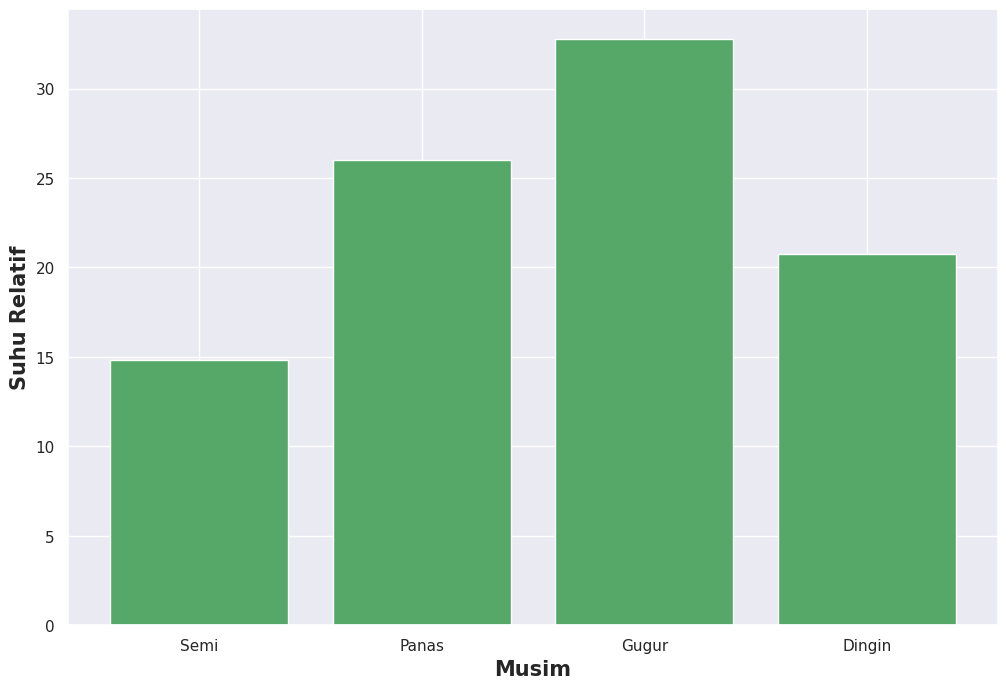

In [19]:
ss_temp = df_day[["season", "atemp"]].groupby(["season"]).mean()
ss_temp["season"] = ['Semi','Panas','Gugur','Dingin']
plt.figure(figsize=(12, 8))
# plt.plot(ss_temp["season"], 50*ss_temp["atemp"], label = "casual", color="C2")
plt.bar(ss_temp["season"], 50*ss_temp["atemp"], color ='C2')
# plt.xticks(np.arange(0, len(ss_grouped["atemp"]), 1))
# plt.xlabel("Jam")
# plt.ylabel("Jumlah Rata-Rata Pengguna")
plt.xlabel('Musim', fontweight ='bold', fontsize = 15)
plt.ylabel('Suhu Relatif', fontweight ='bold', fontsize = 15)
plt.show()

Apabila suhu relatif ditinjau per musim pun, terlihat memang suhu relatif tertinggi terjadi pada musim panas dan musim semi

**Pengguna Casual di Hari Libur berdasarkan Suhu Relatif**

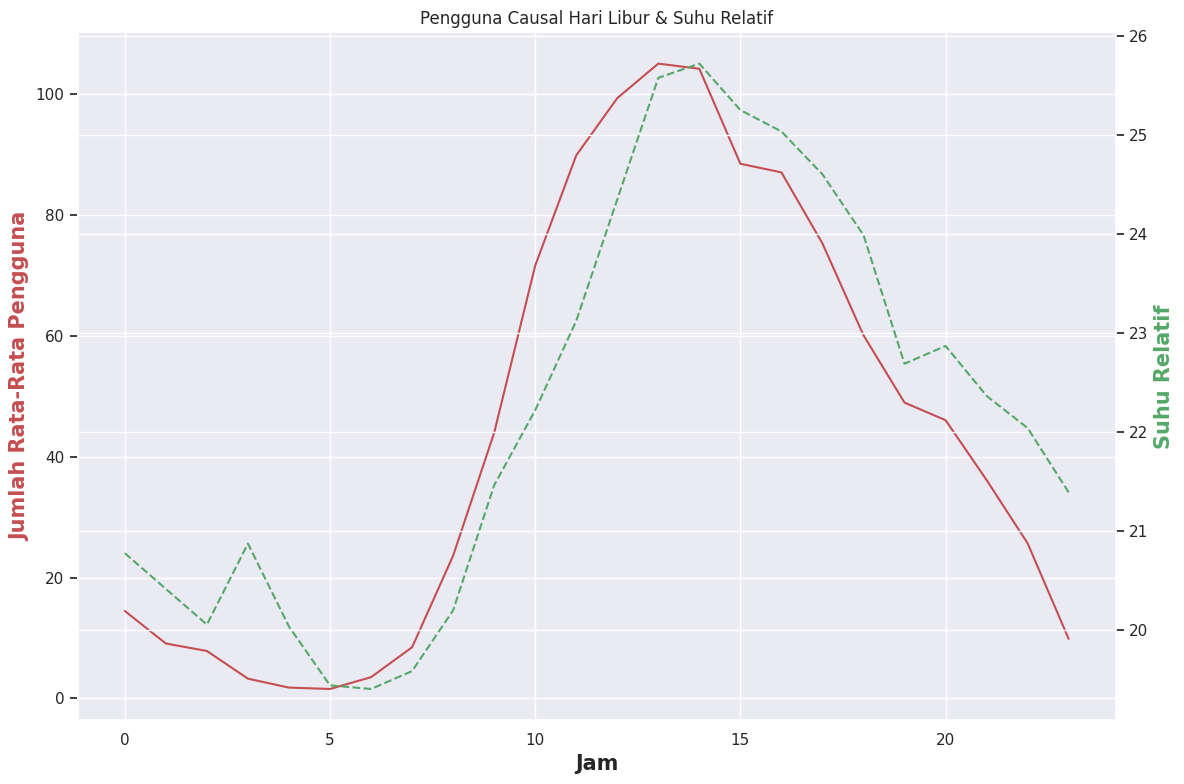

In [20]:
hld_grouped = df_hour[df_hour["holiday"] == 1][["hr", "casual", "registered","atemp"]].groupby(["hr"]).mean()

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.title.set_text('Pengguna Causal Hari Libur & Suhu Relatif')
ax1.set_xlabel('Jam', fontweight ='bold', fontsize = 15)
ax1.set_ylabel('Jumlah Rata-Rata Pengguna', fontweight ='bold', fontsize = 15, color="C3")
ax1.plot(hld_grouped.index, hld_grouped["casual"], color="C3")
ax2 = ax1.twinx()
ax2.set_ylabel('Suhu Relatif', fontweight ='bold', fontsize = 15, color="C2")
ax2.plot(hld_grouped.index, 50*hld_grouped["atemp"], color="C2", linestyle="--")
fig.tight_layout()
plt.show()

Dilihat dari pengguna casual pada hari libur, jam pada hari libur dengan suhu relatif yang tinggi juga menunjukkan penggunaan jasa bike sharing yang tinggi. Hal ini sesuai dengan intuisi sebelumnya bahwa pengguna casual cenderung menggunakan jasa bike sharing untuk rekreasi dan tentunya lebih memilih untuk bersepeda dengan kondisi cuaca yang optimal agar lebih bisa menikmati pengalamannya

**Pengguna Registered di Hari Libur berdasarkan Suhu Relatif**

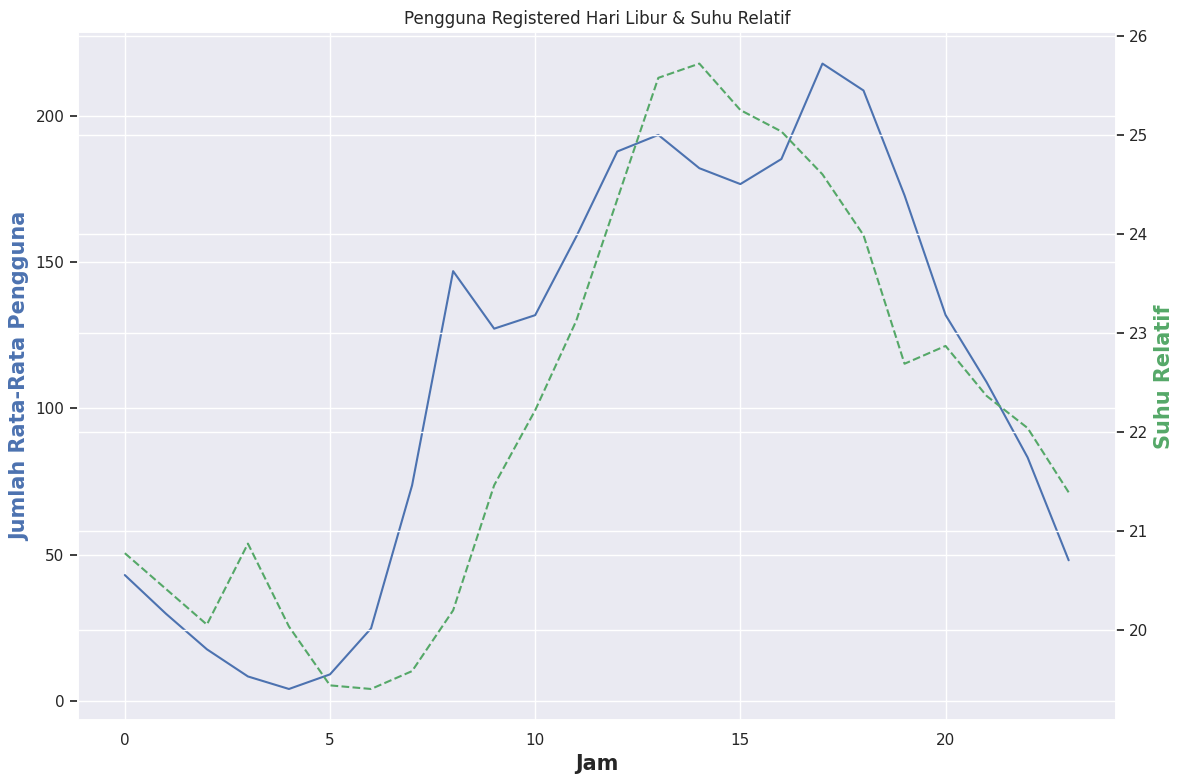

In [21]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.title.set_text('Pengguna Registered Hari Libur & Suhu Relatif')
ax1.set_xlabel('Jam', fontweight ='bold', fontsize = 15)
ax1.set_ylabel('Jumlah Rata-Rata Pengguna', fontweight ='bold', fontsize = 15, color="C0")
ax1.plot(hld_grouped.index, hld_grouped["registered"], color="C0")
ax2 = ax1.twinx()
ax2.set_ylabel('Suhu Relatif', fontweight ='bold', fontsize = 15, color="C2")
ax2.plot(hld_grouped.index, 50*hld_grouped["atemp"], color="C2", linestyle="--")
fig.tight_layout()
plt.show()

Pengguna registered yang menggunakan jasa bike sharing di akhir pekan juga lebih memilih untuk bersepeda dengan kondisi cuaca yang optimal dimana penggunaanya memuncak di sekitar saat suhu relatif juga memuncak

**Pengguna Casual di Hari Kerja berdasarkan Suhu Relatif**

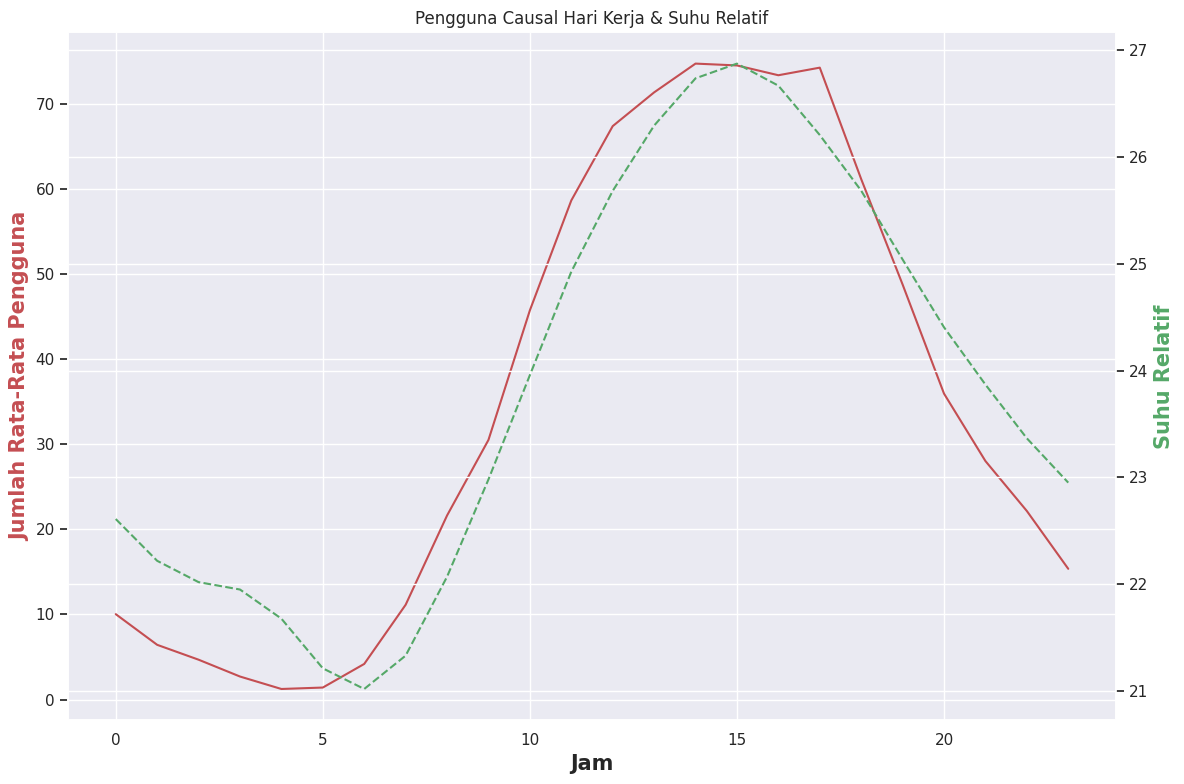

In [22]:
hld_grouped = df_hour[df_hour["holiday"] == 0][["hr", "casual", "registered","atemp"]].groupby(["hr"]).mean()

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.title.set_text('Pengguna Causal Hari Kerja & Suhu Relatif')
ax1.set_xlabel('Jam', fontweight ='bold', fontsize = 15)
ax1.set_ylabel('Jumlah Rata-Rata Pengguna', fontweight ='bold', fontsize = 15, color="C3")
ax1.plot(hld_grouped.index, hld_grouped["casual"], color="C3")
ax2 = ax1.twinx()
ax2.set_ylabel('Suhu Relatif', fontweight ='bold', fontsize = 15, color="C2")
ax2.plot(hld_grouped.index, 50*hld_grouped["atemp"], color="C2", linestyle="--")
fig.tight_layout()
plt.show()

Bahkan di hari biasa pun terlihat korelasi kuat antara penggunaan jasa bike sharing oleh pengguna casual dan pergerakan suhu relatif

**Pengguna Registered di Hari Kerja berdasarkan Suhu Relatif**

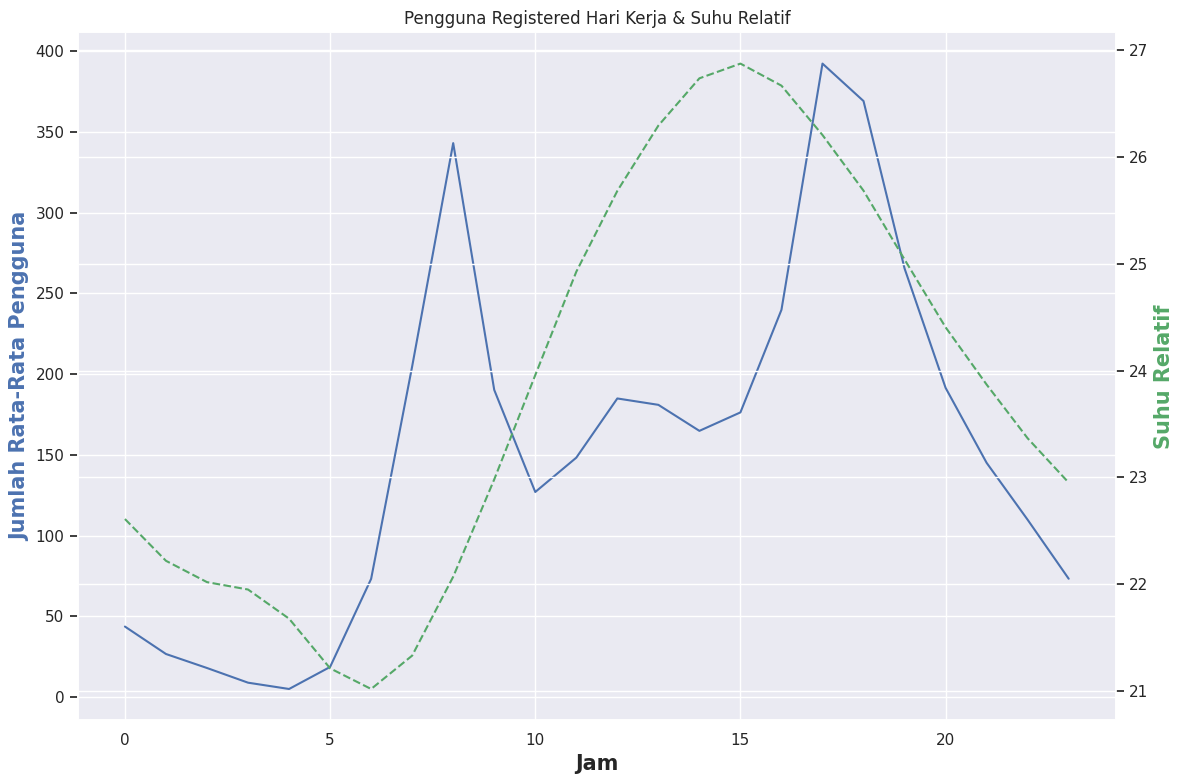

In [23]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.title.set_text('Pengguna Registered Hari Kerja & Suhu Relatif')
ax1.set_xlabel('Jam', fontweight ='bold', fontsize = 15)
ax1.set_ylabel('Jumlah Rata-Rata Pengguna', fontweight ='bold', fontsize = 15, color="C0")
ax1.plot(hld_grouped.index, hld_grouped["registered"], color="C0")
ax2 = ax1.twinx()
ax2.set_ylabel('Suhu Relatif', fontweight ='bold', fontsize = 15, color="C2")
ax2.plot(hld_grouped.index, 50*hld_grouped["atemp"], color="C2", linestyle="--")
fig.tight_layout()
plt.show()

Namun hal ini berbeda dengan pola penggunaan jasa bike sharing oleh pengguna registered di hari kerja karena memang digunakan untuk menuju tempat aktivitas sehari-harinya dan lebih berpatok dengan rutinitas dan suhu relatif menjadi faktor yang kurang penting daripada yang diamati secara umum. Saat suhu relatif memuncak di tengah hari pun, pengguna registered berada di puncak kesibukan aktivitas sehari-harinya sehingga penggunaan jasa bike sharing tidak mengikuti pola pada umumnya.

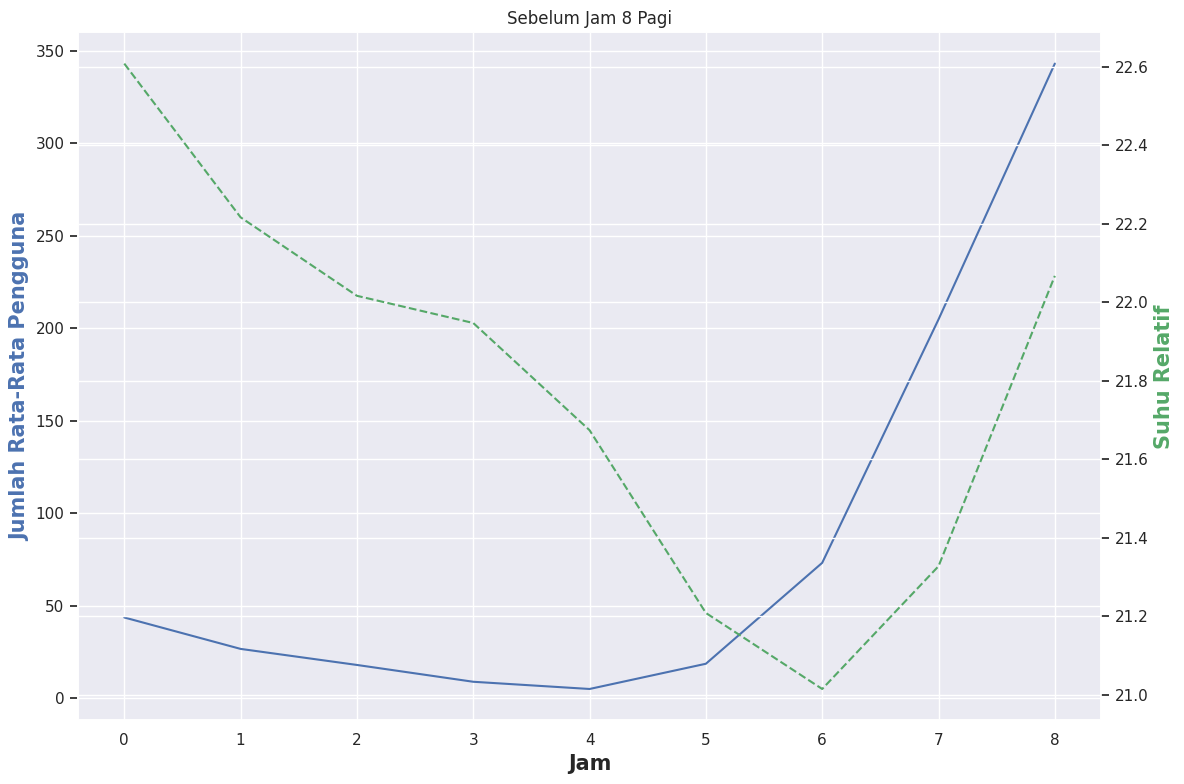

In [24]:
df_temp = df_hour[(df_hour["holiday"] == 0) & (df_hour["hr"] <= 8)]
hld_grouped = df_temp[df_temp["holiday"] == 0][["hr", "casual", "registered","atemp"]].groupby(["hr"]).mean()

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.title.set_text('Sebelum Jam 8 Pagi')
ax1.set_xlabel('Jam', fontweight ='bold', fontsize = 15)
ax1.set_ylabel('Jumlah Rata-Rata Pengguna', fontweight ='bold', fontsize = 15, color="C0")
ax1.plot(hld_grouped.index, hld_grouped["registered"], color="C0")
ax2 = ax1.twinx()
ax2.set_ylabel('Suhu Relatif', fontweight ='bold', fontsize = 15, color="C2")
ax2.plot(hld_grouped.index, 50*hld_grouped["atemp"], color="C2", linestyle="--")
fig.tight_layout()
plt.show()

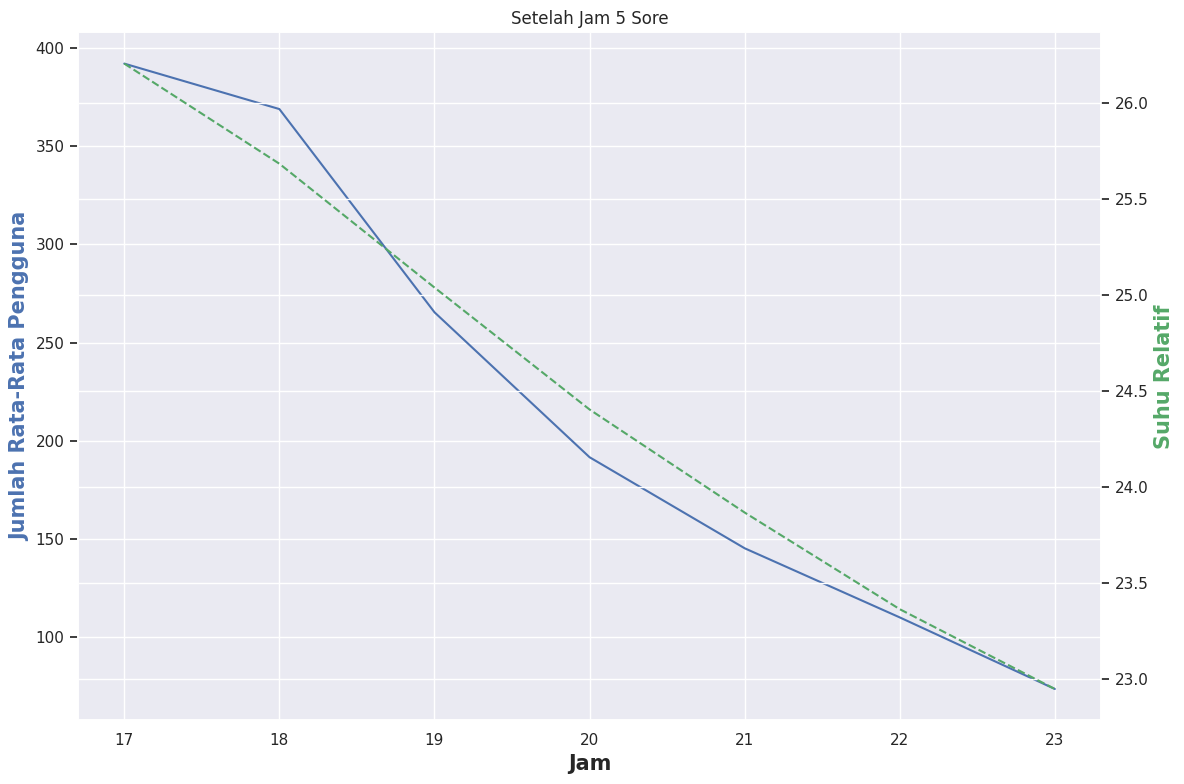

In [25]:
df_temp = df_hour[(df_hour["holiday"] == 0) & (df_hour["hr"] >= 17)]
hld_grouped = df_temp[df_temp["holiday"] == 0][["hr", "casual", "registered","atemp"]].groupby(["hr"]).mean()

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.title.set_text('Setelah Jam 5 Sore')
ax1.set_xlabel('Jam', fontweight ='bold', fontsize = 15)
ax1.set_ylabel('Jumlah Rata-Rata Pengguna', fontweight ='bold', fontsize = 15, color="C0")
ax1.plot(hld_grouped.index, hld_grouped["registered"], color="C0")
ax2 = ax1.twinx()
ax2.set_ylabel('Suhu Relatif', fontweight ='bold', fontsize = 15, color="C2")
ax2.plot(hld_grouped.index, 50*hld_grouped["atemp"], color="C2", linestyle="--")
fig.tight_layout()
plt.show()

Tapi apabila ditinjau di jam-jam diluar aktivitas sehari-hari pada biasanya, penggunaan jasa bike sharing untuk pengguna registered pun mengikuti pola pergerakan suhu relatif (seperti bisa dilihat dari grafik penggunaan pengguna registered sebelum jam 8 pagi dan setelah jam 5 sore di hari-hari kerja diatas)

## Conclusion

- Pengguna Registered lebih cenderung menggunakan jasa bike sharing sebagai sarana transportasi untuk melakukan aktivitas sehari-hari di hari kerja terutama di jam 8 pagi dan jam 5 sore sedangkan pengguna casual lebih cenderung menggunakan jasa bike sharing untuk rekreasi di hari libur

- Secara umum penggunaan jasa bike sharing berkorelasi kuat dengan suhu relatif atau 'feel temperature', yaitu suhu yang sudah diperhitungkan faktor kecepatan angin dan kelembapan udara. Semakin tinggi suhu relatif semakin tinggi juga pengguna jasa bike sharing, seperti di saat musim panas dan musim gugur apabila dilihat secara musiman dan apabila dilihat secara harian hal ini terjadi di waktu-waktu yang mendekati tengah hari

**Rekomendasi**

- Model bisnis perusahaan dapat disesuaikan dengan tidak menawarkan satu jenis program langganan (registered users) saja

- Mengadakan program langganan musiman (seasonal pass) untuk jasa bike sharing khusus di musim panas dan musim gugur untuk mengakomodasi pengguna yang tidak teregistrasi namun menggunakan jasa bike sharing yang sebagian besar terjadi di musim-musim tersebut

- Mengadakan program langganan yang lebih murah khusus di weekday saja bagi pengguna yang memanfaatkan jasa bike sharing sebagai sarana transportasi untuk beraktivitas sehari-hari dan program langganan khusus weekend untuk pengguna casual yang sering menggunakan jasa bike sharing di akhir pekan untuk berekreasi